In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving aloevera.jpg to aloevera.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


[[[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 ...

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]]


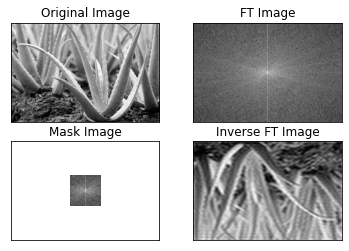

In [ ]:
img = cv2.imread('aloevera.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
crow,ccol=int(crow),int(ccol)
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
#print(mask[121,153])
# apply mask and inverse DFT
fshift = dft_shift*mask
magnitude_spectrum1 = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
#cv2_imshow(magnitude_spectrum1)
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(fshift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
print(mask)
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('FT Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('Mask Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img_back, cmap = 'gray')
plt.title('Inverse FT Image'), plt.xticks([]), plt.yticks([])
plt.show()

#cv2_imshow(img_back)
